#LoanTap

##Problem Statement

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!gdown 14Ptt2BHBmrVerPHg-PnffYxpgMyrP-v7

Downloading...
From: https://drive.google.com/uc?id=14Ptt2BHBmrVerPHg-PnffYxpgMyrP-v7
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 49.4MB/s] 


In [ ]:
df = pd.read_csv('logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## EDA

In [ ]:
df.shape

(396030, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
df['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [ ]:
df['sub_grade'].value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

In [ ]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [ ]:
df['verification_status'].value_counts()

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64

In [ ]:
df['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [ ]:
df['title'].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [ ]:
df['dti'].value_counts()

dti
0.00     313
14.40    310
19.20    302
16.80    301
18.00    300
        ... 
59.18      1
48.37      1
45.71      1
42.38      1
55.53      1
Name: count, Length: 4262, dtype: int64

In [ ]:
df['open_acc'].value_counts().sort_index()

open_acc
0.0         6
1.0        85
2.0      1459
3.0      4783
4.0     10709
        ...  
56.0        2
57.0        1
58.0        1
76.0        2
90.0        1
Name: count, Length: 61, dtype: int64

In [ ]:
df['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [ ]:
df['pub_rec_bankruptcies'].value_counts().sort_index()

pub_rec_bankruptcies
0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: count, dtype: int64

#### Column Profiling:

* Loan_amt: Loan amount borrowed by the customer
* term : No of payments of loan in months(36/60)
* int_rate : Interest rate of the loan  
* installment : Amount to be payed by the customer monthly
* grade : LapTap grade (A to G)
* sub-grade : LoanTap sub-grade (1 to 5 against each grade)
* emp-title : Job role of the customer
* emp-length : Employment length in years (0 to 10)
* home-ownership : home ownership status (Mortgage, rent, own , other, none,any)
* annual_inc : annual income declared by the customer
* verification_status : income verified by LoanTap (Verified,Source Verified,Not Verified)
* issue_d: month when loan was given
* **loan_status**: Current Status of Loan
* purpose : category procided by borrower (**14** categories)
* title : loan title provided by borrower (**48816** unique values)
* dti : a unique ratio calculated (0 to 56)
* earliest_cr_line : month when the borrower credit line was open
* open_acc : No. of open credit lines of borrower(0-90)
* pub_rec :  No of bad public records
* revol_bal : Total credit balance
* revol_util : Amount of credit used by the customer
* total_acc : total no of credit lines active
* initial_list_status : initial listing status of loan (W,F)
* application_type : type (Joint, Individual , Direct Pay)
* mort_acc : No of mortage accounts
* pub_rec_bankruptcies : No of public record of bankruptcies
* Address : address of the individual


In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


#### Unique Values

In [ ]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

#### Checking for null values

In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

#### Distribution of target variable

In [ ]:
df['loan_status'].value_counts(normalize=True)

loan_status
Fully Paid     0.803871
Charged Off    0.196129
Name: proportion, dtype: float64

* There is imbalance in the data so accuracy metric cannot be used for model evaluation
* Lets fit a model to the data as it is and then try to address the imbalance and then fit a model again

#### Heatmaps to check linearity

<Axes: >

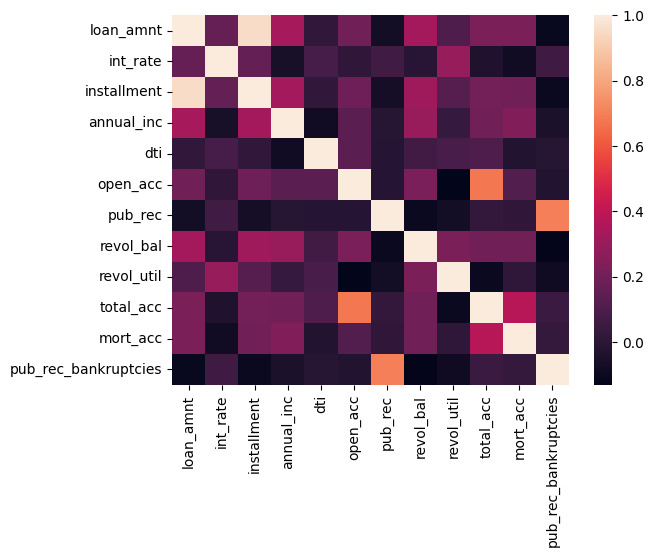

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr())

* From the heat map we can see that loan amount and installment amount are highly correlated . So we can considet one of the feature for further analysis

<Axes: >

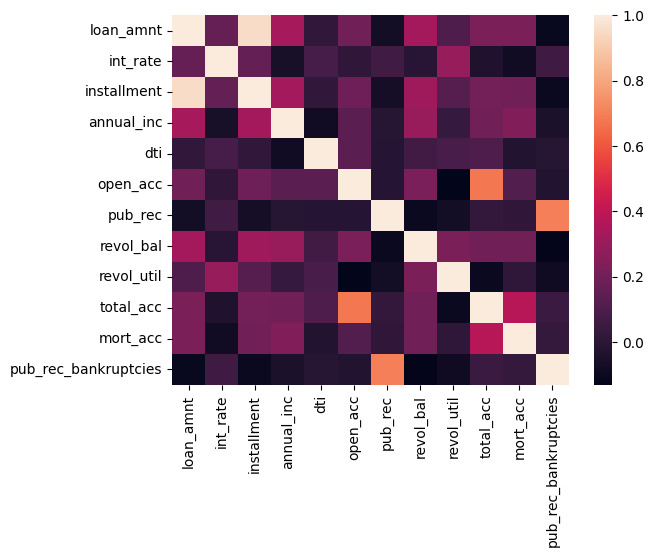

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(method='pearson'))

* From both the heatmaps we see a similar correlation between the columns in both spearman and pearson correlation. This say that the features are non- linear.

In [ ]:
# Dropping installemnt column
df.drop(columns=['installment'],inplace=True)

#### Countplots to detemine behaviour of features against Target Variable

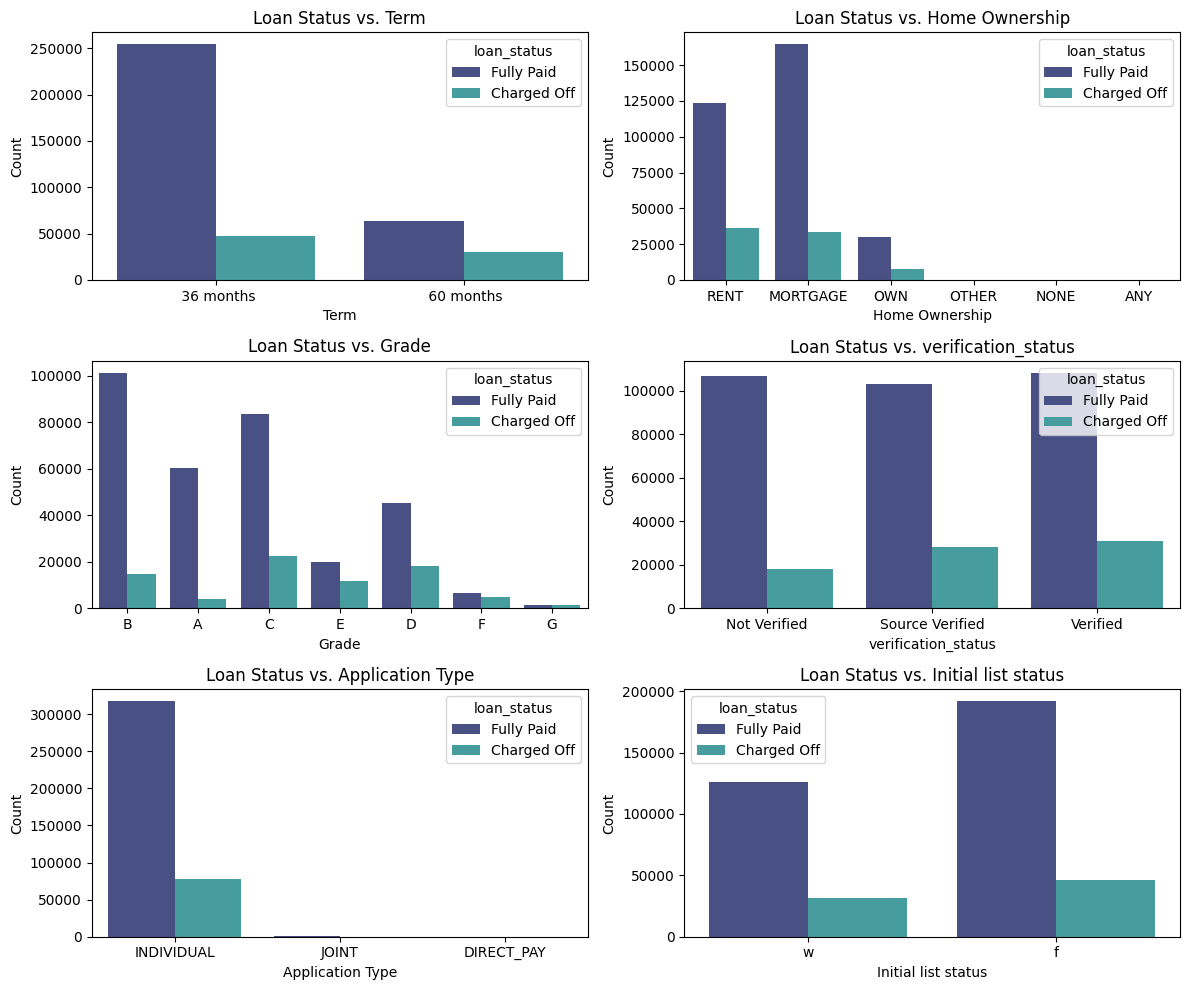

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

sns.countplot(x='term', hue='loan_status', data=df, ax=axes[0,0], palette='mako')
axes[0,0].set_title('Loan Status vs. Term')
axes[0,0].set_xlabel('Term')
axes[0,0].set_ylabel('Count')

sns.countplot(x='home_ownership', hue='loan_status', data=df, ax=axes[0,1], palette='mako')
axes[0,1].set_title('Loan Status vs. Home Ownership')
axes[0,1].set_xlabel('Home Ownership')
axes[0,1].set_ylabel('Count')

sns.countplot(x='grade', hue='loan_status', data=df, ax=axes[1,0], palette='mako')
axes[1,0].set_title('Loan Status vs. Grade')
axes[1,0].set_xlabel('Grade')
axes[1,0].set_ylabel('Count')

sns.countplot(x='verification_status', hue='loan_status', data=df, ax=axes[1,1], palette='mako')
axes[1,1].set_title('Loan Status vs. verification_status')
axes[1,1].set_xlabel('verification_status')
axes[1,1].set_ylabel('Count')

sns.countplot(x='application_type', hue='loan_status', data=df, ax=axes[2,0], palette='mako')
axes[2,0].set_title('Loan Status vs. Application Type')
axes[2,0].set_xlabel('Application Type')
axes[2,0].set_ylabel('Count')

sns.countplot(x='initial_list_status', hue='loan_status', data=df, ax=axes[2,1], palette='mako')
axes[2,1].set_title('Loan Status vs. Initial list status')
axes[2,1].set_xlabel('Initial list status')
axes[2,1].set_ylabel('Count')


# Adjust layout
plt.tight_layout()
plt.show()

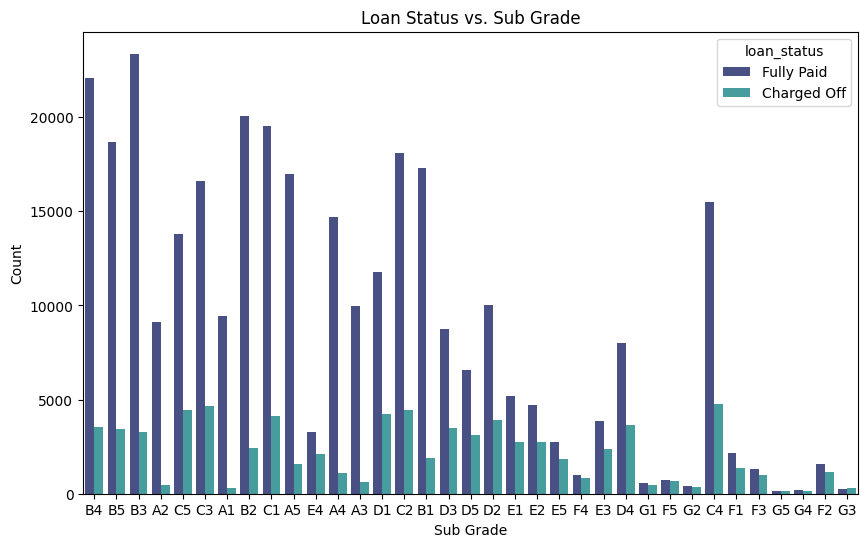

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='sub_grade',hue='loan_status',palette='mako')
plt.title('Loan Status vs. Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

**Observations** from the above countplots:
* People taking loan for period of **36 months** is higher compared to 60 months
* No of people taking loan against house ownership varies as **MORTGAGE > RENT > OWN** , while the other categories are minimal.
* In verification status almost all the categories have **equal** distribution of customers
* When considering the application type for loan we see that **individual** category dominates this feature.
* Most number of people in grade B paid off the loan.
* In Grade B most people in sub_grade **B3** have paid off their loans.
* Small number of people are categorised in **G** grade.
* The no of defaulters in **sub_grade A1** is the least, implying genuine people.

## Feature Engineering

In [ ]:
df['term']=df['term'].str.strip()
map = {'36 months':36,'60 months':60}
df['term']=df['term'].map(map)

In [ ]:
df['emp_length'].value_counts()
df['emp_length']=df['emp_length'].str.strip()
map = {'10+ years':10,'2 years':2,'< 1 year':1,'3 years':3,'5 years':5,'6 years':6,
      '4 years':4,'1 year':1,'7 years':7,'8 years':8,'9 years':9}
df['emp_length']=df['emp_length'].map(map)

In [ ]:
df.loc[(df['home_ownership']=='NONE') |(df['home_ownership']=='ANY'),'home_ownership']='OTHER'

Extracting zip code from address column

In [ ]:
df['zipcode']=df['address'].apply(lambda x:x[-5:])

Dropping the address column

In [ ]:
df.drop(columns=['address'],inplace=True)

In [ ]:
df['grade']=pd.Categorical(df['grade'],categories=['A','B','C','D','E','F','G'],ordered=True)

In [ ]:
df['sub_grade']=pd.Categorical(df['sub_grade'],categories=['A1','A2','A3','A4','A5','B1','B2','B3',
                                          'B4','B5','C1','C2','C3','C4','C5','D1',
                                          'D2','D3','D4','D5','E1','E2','E3','E4',
                                          'E5','F1','F2','F3','F4','F5','G1','G2',
                                           'G3','G4','G5'
                                          ],ordered=True)

In [ ]:
df['verification_status']=df['verification_status'].astype('category')

In [ ]:
df['initial_list_status'].astype('category')
df['application_type'].astype('category')

0         INDIVIDUAL
1         INDIVIDUAL
2         INDIVIDUAL
3         INDIVIDUAL
4         INDIVIDUAL
             ...    
396025    INDIVIDUAL
396026    INDIVIDUAL
396027    INDIVIDUAL
396028    INDIVIDUAL
396029    INDIVIDUAL
Name: application_type, Length: 396030, dtype: category
Categories (3, object): ['DIRECT_PAY', 'INDIVIDUAL', 'JOINT']

In [ ]:
df['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [ ]:
df['title'].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

Purpose and title gives the same information so lets take one columns(purpose) for further computation as title has mistakes

In [ ]:
df.drop(columns=['title'],inplace=True)

In [ ]:
df['issue_d']= pd.to_datetime(df['issue_d'])
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])
df['issue_year']=df['issue_d'].dt.year
df['issue_month']=df['issue_d'].dt.month
df['earliest_cr_year']=df['earliest_cr_line'].dt.year
df['earliest_cr_month']=df['earliest_cr_line'].dt.month

<ipython-input-38-c9aab1ed1901>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['issue_d']= pd.to_datetime(df['issue_d'])
<ipython-input-38-c9aab1ed1901>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])


In [ ]:
df.drop(columns=['issue_d','earliest_cr_line'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  int64   
 2   int_rate              396030 non-null  float64 
 3   grade                 396030 non-null  category
 4   sub_grade             396030 non-null  category
 5   emp_title             373103 non-null  object  
 6   emp_length            377729 non-null  float64 
 7   home_ownership        396030 non-null  object  
 8   annual_inc            396030 non-null  float64 
 9   verification_status   396030 non-null  category
 10  loan_status           396030 non-null  object  
 11  purpose               396030 non-null  object  
 12  dti                   396030 non-null  float64 
 13  open_acc              396030 non-null  float64 
 14  pub_rec               396030 non-nul

### Missing Values and Outlier Treatment

### **Box Plot representing outliers**

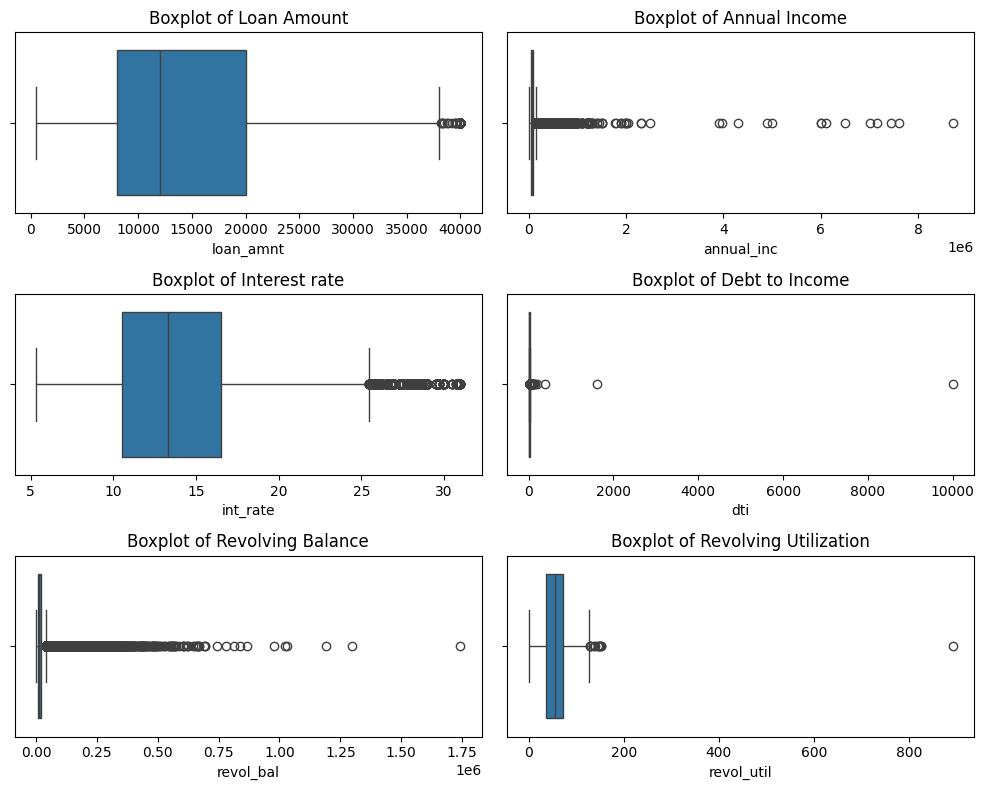

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(3, 2, 1)
sns.boxplot(data=df, x='loan_amnt')
plt.title('Boxplot of Loan Amount')

plt.subplot(3, 2, 2)
sns.boxplot(data=df, x='annual_inc')
plt.title('Boxplot of Annual Income')

plt.subplot(3, 2, 3)
sns.boxplot(data=df, x='int_rate')
plt.title('Boxplot of Interest rate')

plt.subplot(3, 2, 4)
sns.boxplot(data=df, x='dti')
plt.title('Boxplot of Debt to Income')

plt.subplot(3, 2, 5)
sns.boxplot(data=df, x='revol_bal')
plt.title('Boxplot of Revolving Balance')

plt.subplot(3, 2, 6)
sns.boxplot(data=df, x='revol_util')
plt.title('Boxplot of Revolving Utilization')

plt.tight_layout()
plt.show()

In [ ]:
df_new = df.copy()
outlier_cols = ['loan_amnt','int_rate','annual_inc','dti','revol_bal','revol_util']

# Function to remove outliers from specified columns
def remove_outliers(df, cols):
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # Filter the dataframe to exclude outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function to the dataframe
df_new = remove_outliers(df_new, outlier_cols)

### **Box Plot post Outlier Treatment**

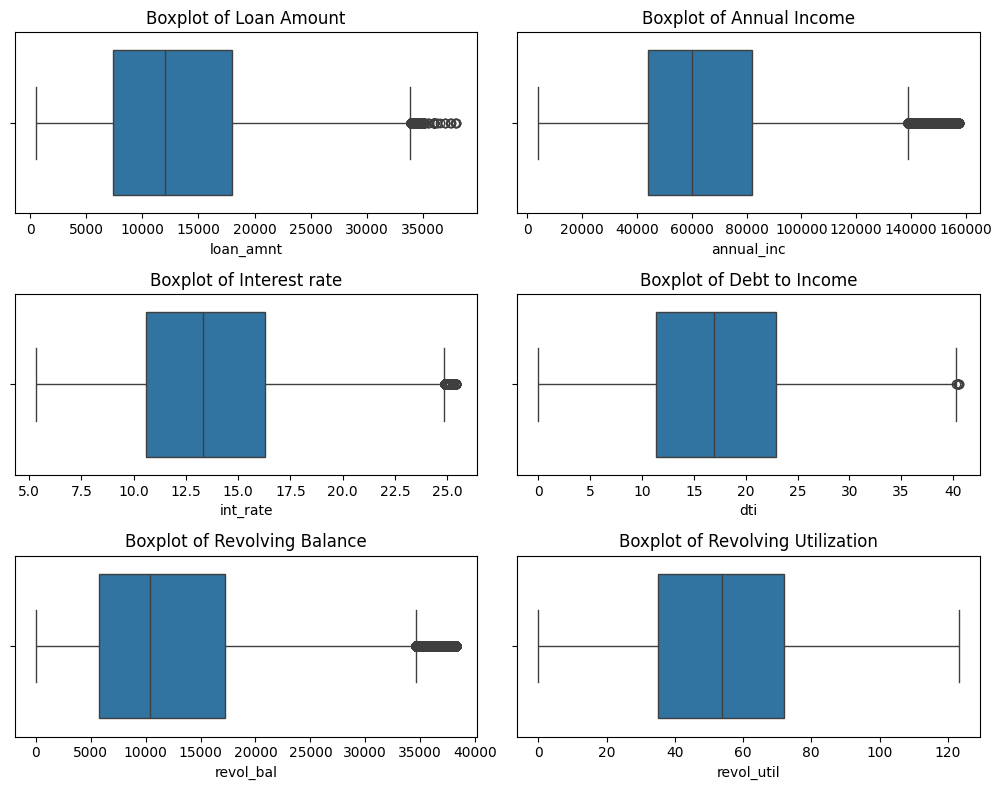

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(3, 2, 1)
sns.boxplot(data=df_new, x='loan_amnt')
plt.title('Boxplot of Loan Amount')

plt.subplot(3, 2, 2)
sns.boxplot(data=df_new, x='annual_inc')
plt.title('Boxplot of Annual Income')

plt.subplot(3, 2, 3)
sns.boxplot(data=df_new, x='int_rate')
plt.title('Boxplot of Interest rate')

plt.subplot(3, 2, 4)
sns.boxplot(data=df_new, x='dti')
plt.title('Boxplot of Debt to Income')

plt.subplot(3, 2, 5)
sns.boxplot(data=df_new, x='revol_bal')
plt.title('Boxplot of Revolving Balance')

plt.subplot(3, 2, 6)
sns.boxplot(data=df_new, x='revol_util')
plt.title('Boxplot of Revolving Utilization')

plt.tight_layout()
plt.show()

In [ ]:
df_new.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
grade                       0
sub_grade                   0
emp_title               21099
emp_length              17289
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                34714
pub_rec_bankruptcies      483
zipcode                     0
issue_year                  0
issue_month                 0
earliest_cr_year            0
earliest_cr_month           0
dtype: int64

* pub_rec_bankruptcies has very small number of null values we shall drop these
* For mort_acc and emp_length we need to impute the values
* For emp_title column we ll drop the column as it have many unique values

### Loan amount v/s Employee Title

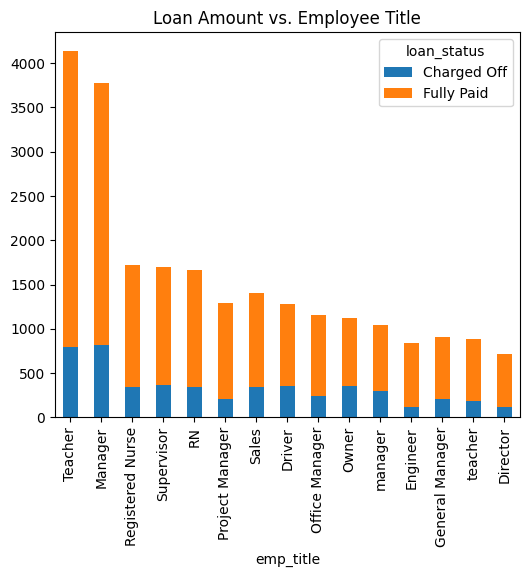

In [ ]:
g = df_new.groupby(['emp_title','loan_status']).size().unstack(fill_value=0).sort_values(by='Fully Paid',ascending=False)

g.head(15).plot(kind='bar', stacked=True, figsize=(6, 5))
plt.xticks(rotation=90)
plt.title('Loan Amount vs. Employee Title')
plt.show()

* Customers with job roles of teacher , manager , Nurse , Superviser are the ones who have taken most number of loans

In [ ]:
df_new.dropna(subset=['pub_rec_bankruptcies'],inplace=True)

In [ ]:
df_new.drop(columns=['emp_title'],inplace=True)

### Missing Value Imputation

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_new['emp_length']=imputer.fit_transform(df_new[['emp_length']])
df_new['emp_length']=round(df_new['emp_length'])

df_mort=round(df_new.groupby('total_acc')[['mort_acc']].mean(),0).reset_index()

In [ ]:
df1 = df_new.copy()

### Label Encoding

In [ ]:
df_merged=df_new.merge(df_mort,how='left',on='total_acc',suffixes=('','_mean'))
df_merged['mort_acc'].fillna(df_merged['mort_acc_mean']).isna().value_counts()
df_merged['mort_acc'] = df_merged['mort_acc'].fillna(df_merged['mort_acc_mean'])
df_merged.drop(columns=['mort_acc_mean'],inplace=True)

In [ ]:
map={'Charged Off':1,'Fully Paid':0}
df_merged['loan_status']=df_merged['loan_status'].map(map)

In [ ]:
map={'w':0,'f':1}
df_merged['initial_list_status']=df_merged['initial_list_status'].map(map)

In [ ]:
df_merged

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zipcode,issue_year,issue_month,earliest_cr_year,earliest_cr_month
0,10000.0,36,11.44,B,B4,10.0,RENT,117000.0,Not Verified,0,...,25.0,0,INDIVIDUAL,0.0,0.0,22690,2015,1,1990,6
1,8000.0,36,11.99,B,B5,4.0,MORTGAGE,65000.0,Not Verified,0,...,27.0,1,INDIVIDUAL,3.0,0.0,05113,2015,1,2004,7
2,15600.0,36,10.49,B,B3,1.0,RENT,43057.0,Source Verified,0,...,26.0,1,INDIVIDUAL,0.0,0.0,05113,2015,1,2007,8
3,7200.0,36,6.49,A,A2,6.0,RENT,54000.0,Not Verified,0,...,13.0,1,INDIVIDUAL,0.0,0.0,00813,2014,11,2006,9
4,24375.0,60,17.27,C,C5,9.0,MORTGAGE,55000.0,Verified,1,...,43.0,1,INDIVIDUAL,1.0,0.0,11650,2013,4,1999,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355988,6000.0,36,13.11,B,B4,5.0,RENT,64000.0,Not Verified,0,...,9.0,0,INDIVIDUAL,0.0,0.0,05113,2013,3,1991,11
355989,10000.0,60,10.99,B,B4,2.0,RENT,40000.0,Source Verified,0,...,23.0,0,INDIVIDUAL,0.0,0.0,30723,2015,10,2004,11
355990,5000.0,36,9.99,B,B1,10.0,RENT,56500.0,Verified,0,...,23.0,1,INDIVIDUAL,0.0,0.0,70466,2013,10,1997,3
355991,21000.0,60,15.31,C,C2,10.0,MORTGAGE,64000.0,Verified,0,...,20.0,1,INDIVIDUAL,5.0,0.0,29597,2012,8,1990,11


## Train Test Split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_merged.drop(columns=['loan_status'])
y = df_merged['loan_status']

In [ ]:
X_train_cv,X_test,y_train_cv,y_test = train_test_split(X,y,test_size=0.25,random_state=1)
X_train,X_test_cv,y_train,y_test_cv = train_test_split(X_train_cv,y_train_cv,test_size=0.25,random_state=1)

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

In [ ]:
encoding_cols = ['grade','sub_grade','home_ownership','verification_status','purpose',
                'application_type','zipcode']

encoder=TargetEncoder()

for i in encoding_cols:
    X_train[i]=encoder.fit_transform(X_train[i],y_train)
    X_test_cv[i]=encoder.transform(X_test_cv[i])
    X_test[i]=encoder.transform(X_test[i])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test_cv = scaler.transform(X_test_cv)
X_test = scaler.transform(X_test)

## Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

Accuracy Score of the model

In [ ]:
round(model.score(X_test,y_test)*100,2)

88.68

* Accuracy of our initial model is 88.68% which seems to be decent, but  accuracy is not the best score when you have imbalanced dataset. Since ours is an imbalanced dataset accuracy can be sometime misleading so we will check some more evaulation metric to see whether we have a good model or not.

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve,confusion_matrix

#### Classification Report

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     71438
           1       0.92      0.47      0.62     17561

    accuracy                           0.89     88999
   macro avg       0.90      0.73      0.78     88999
weighted avg       0.89      0.89      0.87     88999



In [ ]:
confusion_matrix(y_test,y_pred)

array([[70710,   728],
       [ 9343,  8218]])

From the above observations we can say that

* Precision for debtor (class 0) is high.
* Precision for defaulter (class 1)is also high, which means the model predicts a customer a defaulter then there is chance that 92% the customer is a defaulter.
* Sensitivity for Debtor class is high
* Sensitivity for Defaulter class is low which means there are more False Negatives which is confirmed by the confusion matrix

There are 2 possible reasons of low sensitivity of defaulter class
* Data imbalance as there is more records in class 0
* The threshold for classsification is 0.5


#### ROC Curve

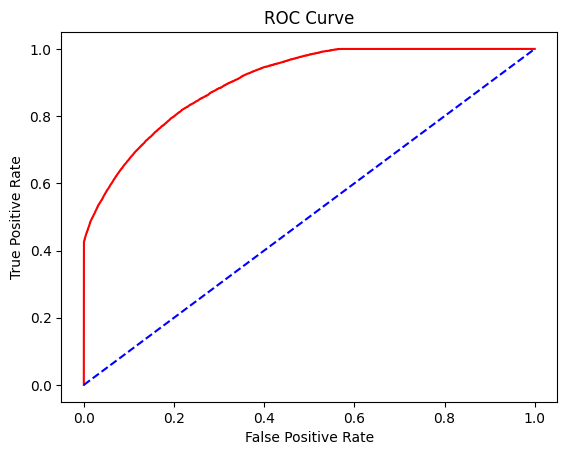

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred)

0.9027110874527822

#### Precision-Recall Curve

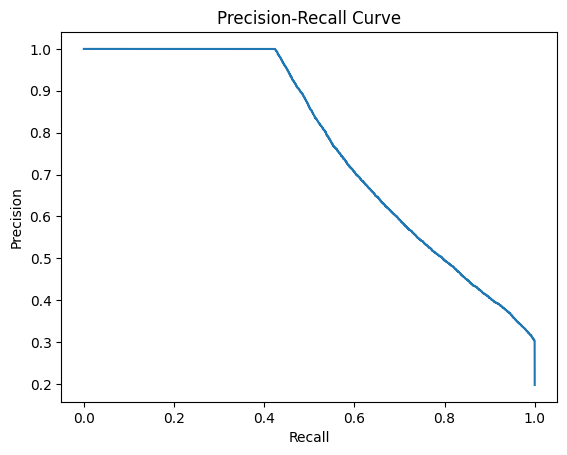

In [ ]:
precision,recall,thresholds = precision_recall_curve(y_test,model.predict_proba(X_test)[:,1])
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

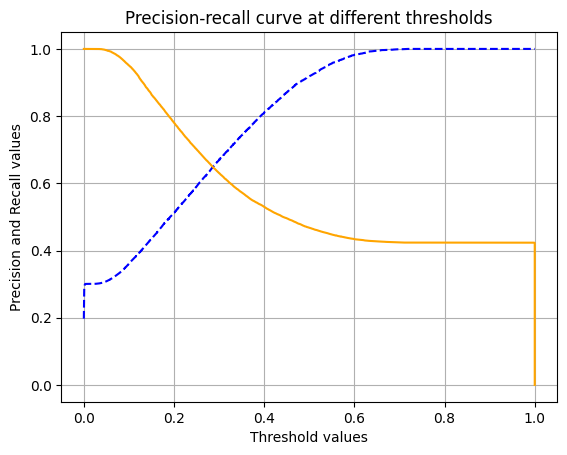

In [ ]:
plt.figure()
plt.plot(thresholds,precision[0:len(thresholds)],linestyle='--',label='precision',color='blue')
plt.plot(thresholds,recall[0:len(thresholds)],label='recall',color='orange')
plt.title("Precision-recall curve at different thresholds")
plt.xlabel("Threshold values")
plt.ylabel("Precision and Recall values")
plt.grid()
plt.show()

* Since precision and recall both are important to our business problem we take the threshold to be 0.3

In [ ]:
y_pred = model.predict_proba(X_test)[:,1]

threshold_considered = 0.3

y_pred_custom = (y_pred>threshold_considered).astype('int')
y_pred_custom

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test,y_pred_custom))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92     71438
           1       0.67      0.63      0.65     17561

    accuracy                           0.87     88999
   macro avg       0.79      0.78      0.78     88999
weighted avg       0.86      0.87      0.86     88999



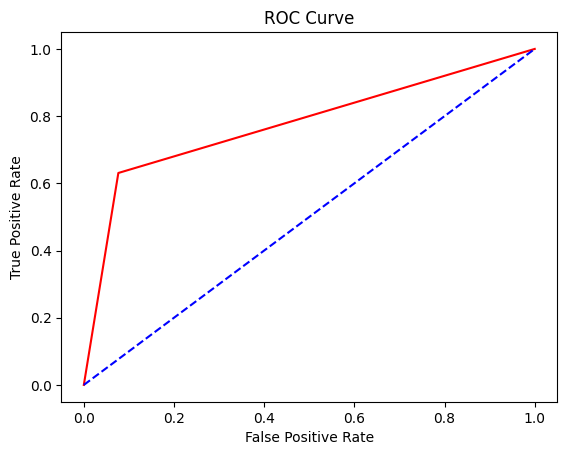

In [ ]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_custom)
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_custom)

0.7771014211318571

From the above plots we see that
* By reducing the threshold from 0.5 to 0.3 the au-roc value decreased
* There was improvement in recall score of defaulters and the f1 score also increased a little bit .

##### Applying SMOTE to balance the data and see if there is improvement in model performance

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smt = SMOTE()
X_sm, y_sm = smt.fit_resample(X_train, y_train)
model = LogisticRegression(C= 5, penalty= 'l1', solver = 'liblinear')

In [ ]:
model.fit(X_sm, y_sm)

LogisticRegression(C=5, penalty='l1', solver='liblinear')

In [ ]:
model.score(X_sm, y_sm)

0.8055745405291216

In [ ]:
train_score = model.predict(X_sm)
test_score = model.predict(X_test)
from sklearn.metrics import f1_score

f1_train = f1_score(y_sm,train_score)
f1_test = f1_score(y_test,test_score)

print(f'Training F1 Score: {f1_train}')
print(f'Test F1 Score: {f1_test}')

Training F1 Score: 0.8048287605017121
Test F1 Score: 0.6152001066050726


### How can we make sure that our model can detect real defaulters and there are less false positives?

Reducing false positives and giving loans only to non-defaulters is crucial in credit / loan industry.Here are some points that might help to achieve it

* Use features that shows a customers credit worthiness like credit score , debt to income ratio , annual income , employement etc
* Create features that might help in prediction such as no of active loans, loan history,repayment pattern
* Usage of other ML algorithms that might handle imbalanced data well like RandomForest , AdaBoost and XGBoost .
* Optimizing the hyperparameters to correctly determine the class.By using Random Search or Grid Search method to determine the best value of hyperparameter.
* Consider metrics like pr-curve , au-roc , f1 score for model evaluation. Focus on maintaining a higher precision value and also a good recall value to reduce false negatives.
* Moniter the model performance , update and retrain to improve model scores.

### Given that NPA (non-performing asset) is a real problem in this industry, How play it safe and avoid disbursing loans to anyone?

1. Adhere to regulatory guidelines and disburse loans responsibly and legally.
2. Conduct a thorough review of the customer's past loan repayment history and establish strict approval criteria.
3. Avoid lending to customers with a history of defaulting or bankruptcy.
4. Stay updated with credit regulations issued by the government and regulatory departments.
5. Monitor the borrower's financial behavior even after disbursing the loan.
6. Utilize alternative sources like utility payments and spending behavior to assess creditworthiness.
7. Establish parameters to identify potential financial distress in customers early.
8. Collaborate with credit bureaus for accurate assessments of creditworthiness.

## **Insights**

1. The number of people taking loans for **36 months** is higher compared to **60 months**.
2. Loan distribution by house ownership is **MORTGAGE > RENT > OWN**, with minimal numbers in other categories.
3. Verification status shows an **equal distribution** of customers across almost all categories.
4. In loan application types, the **individual** category **dominates**.
5. Most people in **Grade B** have paid off their loans.
6. Within **Grade B**, sub-grade **B3** has the highest number of people who have paid off their loans.
7. A **small number** of people are categorized in **G grade**.
8. The number of **defaulters in sub-grade A1** is the least, indicating genuine borrowers.
9. **Precision for debtors (class 0)** is high.
10. **Precision for defaulters (class 1)** is also high, meaning there's a **92% chance** that a predicted defaulter is indeed a defaulter.
11. **Sensitivity for debtors** is high, but sensitivity for defaulters is low, indicating more false negatives, as confirmed by the confusion matrix.
12. **Teachers, managers, nurses, and supervisors** are the job roles with the most loans taken.

## **Recommendations**

* Keep a close track of high-interest loans, as there is a 40% chance of default. Implement stricter monitoring and risk management for these loans.
Promote low-interest loans more aggressively, as the probability of repayment exceeds 90%.
* Encourage joint loans, as they have the highest probability of being fully paid among all categories.
* Offer more term period options, allowing customers to choose payment schedules that align with their income levels.
* Equalize loan distribution among high-paying job title customers, where the expectation for full repayment is higher.
* Maintain a strict approval process for EDUCATION, MEDICAL, and other essential purposes to build customer loyalty.
* Leverage alternative sources like utility payments and spending behavior to assess creditworthiness and reduce defaults.
* Collaborate closely with credit bureaus to ensure accurate assessments of creditworthiness and reduce risk.
* Continuously update and align with regulatory credit rules to maintain compliance and enhance loan disbursement strategies.